In [11]:
import mplsoccer 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import requests
from io import BytesIO
from PIL import Image
from colorthief import ColorThief


### To make the Jersey we need to install those two modules : 

!pip install svgpath2mpl <br>
!pip install svgpathtools


In [ ]:
!pip install svgpath2mpl
!pip install svgpathtools

In [39]:
import matplotlib as mpl
from svgpathtools import svg2paths
from svgpath2mpl import parse_path

jersey_path, attributes = svg2paths('jersey.svg')

In [40]:
jersey_marker = parse_path(attributes[0]['d'])

In [51]:
jersey_marker.vertices -= jersey_marker.vertices.mean(axis=0)

In [50]:
# jersey_marker = jersey_marker.transformed(mpl.transforms.Affine2D().rotate_deg(180))
jersey_marker = jersey_marker.transformed(mpl.transforms.Affine2D().scale(-1,1))

In [43]:
def teamFormation(formation):
    formation = formation.split("-")
    return[int(value) for value in formation]

In [17]:

def draw_formation(formation, color):
    """
    This method draws the formation of a team using the mplsoccer module.
    
    Args:
        formation (str): String representing the formation (RegEx: '^[1-9]-[1-9]-[1-9](-[1-9])?$').
        color (str): String representing the color.
    Returns:
        img: A Plot image representing the formation of the team.
    """
    # Create the pitch
    pitch = mplsoccer.Pitch(goal_type='circle', 
                            linewidth=1, 
                            corner_arcs=True, 
                            pitch_color='grass', 
                            line_color='white', 
                            stripe=True)
    fig, ax = pitch.draw()
    
    # Goalkeeper setup
    ax.scatter(0, 40, c=color, s=600, edgecolors='white', marker=jersey_marker)
    
    x_base = (10 * len(formation)) / len(formation)
    nbr = 4 if len(formation) == 3 else 3
    
    for i, players in enumerate(formation):
        x = x_base + 6 + nbr * i * 10
        for j, player in enumerate(range(1, players + 1)):
            y = player * (80 / players) - 40 / players
            
            if (j == 0 or j == players - 1) and len(range(1, players + 1)) > 2:
                ax.scatter(x=x + 10, y=y, c=color, s=600, edgecolors='white', marker=jersey_marker)
            else:
                ax.scatter(x=x, y=y, c=color, s=600, edgecolors='white', marker=jersey_marker)
    
    return fig


In [18]:
help(draw_formation)

Help on function draw_formation in module __main__:

draw_formation(formation, color)
    This method draws the formation of a team using the mplsoccer module.
    
    Args:
        formation (str): String representing the formation (RegEx: '^[1-9]-[1-9]-[1-9](-[1-9])?$').
        color (str): String representing the color.
    Returns:
        img: A Plot image representing the formation of the team.



In [19]:
def get_dominant_color_from_url(image_url):
    """
    Get the dominant color of an image from the given URL.

    Args:
        image_url (str): URL of the image.

    Returns:
        str: Hex color code of the dominant color.
    """
    # Download the image
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))

    # Save the image to a local file
    image_path = 'local_image.png'
    image.save(image_path, format='PNG')

    # Use ColorThief with the local image file
    color_thief = ColorThief(image_path)
    
    # Get the dominant color
    dominant_color = color_thief.get_color(quality=1)

    # Convert the dominant color to hex format
    hex_color = "#{:02x}{:02x}{:02x}".format(dominant_color[0], dominant_color[1], dominant_color[2])
    return hex_color

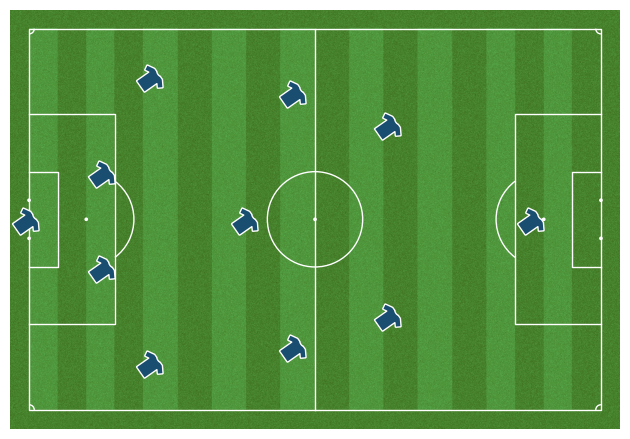

In [49]:
fig = draw_formation(formation = teamFormation("4-3-2-1"), 
               color=get_dominant_color_from_url("https://media-4.api-sports.io/football/teams/109.png"))